In [1]:
from qwop import * 
import pandas as pd
import numpy as np
import copy


### Gradient descent

In [ ]:
def cost_func(theta, penalty_factor=10):
    dist = sim(theta)
    cost = abs(dist) + max(0, -dist) * penalty_factor

    return -cost
    
def calculate_gradient(theta, epsilon=1e-4):
    gradient = np.zeros_like(theta)
    for i in range(len(theta)):
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient

def grad_thighs(theta, epsilon=1e-4):
    gradient = np.zeros_like(theta)
    for i in range(0, len(theta), 2): 
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient

def grad_knees(theta, epsilon=1e-4):
    gradient = np.zeros_like(theta)
    for i in range(1, len(theta), 2):  # Only consider odd indices (knees)
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient


In [ ]:
thetas = [random.uniform(-1, 1) for i in range(40)]

In [ ]:
lr = 0.001
iterations = 1000
for i in range(iterations):
    
    print(f"iteration: {i}, dist: {sim(thetas)} ")

    
    
    if(random.uniform(0, 1) > 0.5):
        gradient = grad_thighs(thetas)
    else:
        gradient = grad_knees(thetas)


    #gradient = calculate_gradient(thetas)
    thetas = thetas + lr * gradient
    thetas = np.clip(thetas, -1, 1)

print("final distance: ", sim(thetas))

In [51]:
#load best
with open('q2_thetas/gradient_descent_best.csv', 'r') as f:
    reader = csv.reader(f)
    thetas = list(reader)

thetas = np.array(thetas)
thetas = thetas.reshape(-1)
thetas = [float(x) for x in thetas ]

In [ ]:
# Random
#thetas = [random.uniform(-1, 1) for i in range(40)]
thetas = [0 for i in range(40)]
lr = 0.0001
iterations = 200
gradient = np.zeros_like(thetas)
isThighs = True
for i in range(iterations):

    current_dist = sim(thetas)
    print("-------")
    if(i % 10 == 0):
        isThighs = not isThighs

        print(f"iteration: {i}, dist: {sim(thetas)} ")
    
    if(random.uniform(0, 1) >= 0.3):
        print("random")
        thetas_copy = thetas.copy()
        thetas_copy = thetas_copy + [random.uniform(-0.1, 0.1) for i in range(40)]
        thetas_copy = np.clip(thetas_copy, -1, 1)

        if(sim(thetas_copy) > sim(thetas)):
            print(sim(thetas_copy))
            print(sim(thetas))
            print("random was better")
            thetas = thetas_copy.copy()
    print("dist:",sim(thetas))
    #gradient = calculate_gradient(thetas)

    if(isThighs):
        gradient = grad_thighs(thetas)
    else:
        gradient = grad_knees(thetas)

    thetas = thetas + lr * gradient
    thetas = np.clip(thetas, -1, 1)

print("final distance: ", sim(thetas))

In [66]:
    
def calculate_gradient(theta, epsilon=0.3):
    gradient = np.zeros_like(theta)
    for i in range(len(theta)):
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient

def grad_thighs(theta, epsilon=0.5):
    gradient = np.zeros_like(theta)
    for i in range(0, len(theta), 2):  # Only consider even indices (thighs)
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient

def grad_knees(theta, epsilon=0.3):
    gradient = np.zeros_like(theta)
    for i in range(1, len(theta), 2):  # Only consider odd indices (knees)
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient

def grad_first(theta, epsilon=0.3):
    gradient = np.zeros_like(theta)
    for i in range( 0,20):  # Only consider odd indices (knees)
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient

def grad_second(theta, epsilon=0.3):
    gradient = np.zeros_like(theta)
    for i in range( 20,len(theta)):  # Only consider odd indices (knees)
        theta_plus_epsilon = theta.copy()
        theta_plus_epsilon[i] += epsilon
        cost_plus_epsilon = sim(theta_plus_epsilon)

        theta_minus_epsilon = theta.copy()
        theta_minus_epsilon[i] -= epsilon
        cost_minus_epsilon = sim(theta_minus_epsilon)

        gradient[i] = (cost_plus_epsilon - cost_minus_epsilon) / (2 * epsilon)

    return gradient




In [67]:
def update_best_gradient(gradient,gradient_t,gradient_k, lr, thetas):
    gradient_random = np.random.uniform(-0.005, 0.005, size=len(thetas))
    dist = sim(thetas + lr * gradient)
    dist_t = sim(thetas + lr * gradient_t)
    dist_k = sim(thetas + lr * gradient_k)
    dist_random = sim(thetas + lr * gradient_random)
    best_index = np.argmax([dist,dist_t,dist_k])   
    
    if(dist_random > np.max([dist,dist_t,dist_k]) and np.random.uniform(0, 1) > 0.7):
        print("random jump")
        return gradient_random    
        
    if(best_index == 0):
        #print("all")
        return gradient
    if(best_index == 1):
        #print("thigh")
        return gradient_t
    if(best_index == 2):
        #print("knee")
        return gradient_k
    
    

    


In [69]:
# Varying knee or thigh
#thetas = [random.uniform(-1, 1) for i in range(40)]
#thetas = [0 for i in range(40)]
lr = 0.1
iterations = 30
gradient = np.zeros_like(thetas)
gradient_thigh = np.zeros_like(thetas)
gradient_knee = np.zeros_like(thetas)
for i in range(iterations):

    current_dist = sim(thetas)
    if(i % 5 == 0):    
        print("-------")
        print(f"iteration: {i}, dist: {sim(thetas)} ")
  

    gradient_thigh = grad_thighs(thetas)
    gradient_knee = grad_knees(thetas)
    gradient_first = grad_first(thetas)
    gradient_second = grad_second(thetas)
    gradient = calculate_gradient(thetas)
    best_gradient = update_best_gradient(gradient,gradient_thigh,gradient_knee,gradient_first ,gradient_second, lr, thetas)
   
    thetas = thetas + lr * best_gradient
    thetas = np.clip(thetas, -1, 1)

print("final distance: ", sim(thetas))

-------
iteration: 0, dist: 5.436813560824407 
-------
iteration: 5, dist: 5.417508287479219 
-------
iteration: 10, dist: 5.410371411950478 


In [58]:
df = pd.DataFrame(thetas)
df.to_csv("q2_thetas/gradient_descent_best.csv", index=False)


In [ ]:
thetas

### Metropolis Hastings

In [17]:
samples = []
#load best metropolis
with open('q2_thetas/mcmc.csv', 'r') as f:
    reader = csv.reader(f)
    thetas = list(reader)

thetas = np.array(thetas)
thetas = thetas.reshape(-1)
thetas = [float(x) for x in thetas ]
samples.append(thetas)


In [18]:
sim(samples[-1])

-0.8419560318026114

In [15]:

# Define your likelihood function

def likelihood(parameters):
    # Implement your QWOP game simulation to get the distance based on the parameters
    distance = sim(parameters)
    # You may need to consider the negative of the distance if your optimization is a maximization problem
   
    return distance

# Define your prior distribution
def prior(parameters):
    # You can define a prior distribution based on your beliefs about the parameter values
    # For simplicity, you can use a uniform prior in the range [-1, 1]
    if all(-1 <= p <= 1 for p in parameters):
        return 0.0  # Valid parameters
    else:
        return -1000  # Invalid parameters

# Define the posterior distribution as the product of likelihood and prior (up to a constant)
def posterior(parameters):
    return likelihood(parameters) + prior(parameters)

# Implement the Metropolis-Hastings MCMC algorithm
def metropolis_hastings(initial_parameters, num_samples):
    current_parameters = initial_parameters
    samples = [current_parameters]

    for i in range(num_samples):
        if(i % 1000 == 0):
            print(f'current iteration: {i}, current score: {sim(current_parameters)}')

        # Propose a new set of parameters
        proposal_parameters = current_parameters + np.random.normal(-0.7, 0.7, size=len(initial_parameters))
        proposal_parameters_smaller = current_parameters + np.random.normal(-0.1, 0.1, size=len(initial_parameters))
        
        acceptance_ratio_smaller = np.exp(posterior(proposal_parameters) - posterior(proposal_parameters_smaller))
  
        # Calculate acceptance ratio
        acceptance_ratio = np.exp(posterior(proposal_parameters) - posterior(current_parameters))


        # Accept or reject the proposal
        if np.random.uniform(1.0) < acceptance_ratio_smaller:
            proposal_parameters = proposal_parameters_smaller

        # Accept or reject the proposal
        if np.random.uniform(1.0) < acceptance_ratio:
            current_parameters = proposal_parameters

      
        # Accept or reject the proposal
        if np.random.uniform(1.0) < acceptance_ratio:
            current_parameters = proposal_parameters
        samples.append(current_parameters)

    return np.array(samples)

# Set the initial parameters and the number of MCMC samples
#initial_parameters = np.random.uniform(-1, 1, size=40)
num_samples = 100

# Run the Metropolis-Hastings algorithm


In [16]:
samples = metropolis_hastings(samples[-1], num_samples)

current iteration: 0, current score: 3.069780360410085


In [85]:
 np.random.normal(-0.5, 0.5, size=len(initial_parameters))

array([-0.15524207, -0.4718546 , -0.2379065 , -0.66346724, -0.68676556,
       -0.80504368, -0.6393135 , -0.61731742, -0.64469077,  0.07897391,
       -0.55760368, -0.96181765, -1.04920419,  0.1181599 , -0.15337143,
       -0.58693528,  0.13017472, -0.05887193, -1.11211607, -1.33713765,
       -0.46729326,  0.3932615 , -0.27925069, -0.51328535, -0.86879705,
       -1.17111571, -0.25798652, -0.80759576,  0.02692752,  0.01552099,
       -0.5707944 , -0.69073733, -0.24133911, -0.88378823, -0.5251939 ,
       -1.0509074 , -0.12289482, -1.18275454, -0.76524582, -0.08807028])

In [64]:
proposed = 3.05
current = 3.02
np.exp(proposed - current )


1.0304545339535167

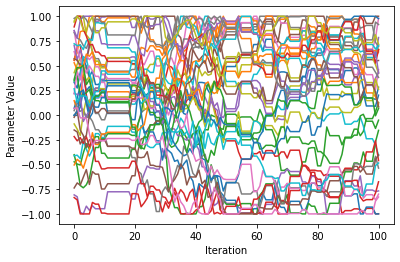

In [3]:
plt.plot(samples)
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.show()

In [5]:
sim(samples[-1])


-0.8666637160509213

In [ ]:
df = pd.DataFrame(np.array(samples[-1]))
df.to_csv("q2_thetas/mcmc.csv", index=False)
